## Capstone: Insider Threat Detection

### Feature Extraction/Engineering to be used as input parameters to Anomaly Detection Model(s)

#### Graph Analysis: Inter-relationship between users and PCs

Let's construct an undirected bipartite graph with:
- 'users' and 'pc' as nodes
- edges representing the relationship between the users and pc(s)
- edge weights representing the total number of Logoff events

In [5]:
import pandas as pd

import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

In [2]:
# Load data: Subset of 'logon' data (only for logoff events, processed and saved previously)

gparams = pd.read_csv('./Data_Subset/graph_params_logoff.csv')

In [4]:
gparams.shape

(640, 4)

In [10]:
gparams.head()

,user,pc,activity,activity_cnt
0,AAN0077,PC-9130,Logoff,340
1,AAW0103,PC-5914,Logoff,345
2,ACE0265,PC-2723,Logoff,345
3,ACL0394,PC-6394,Logoff,345
4,ACL0394,PC-7496,Logoff,27


In [35]:
gparams.isnull().sum()

user            0
pc              0
activity        0
activity_cnt    0
dtype: int64

In [17]:
# G(V,E,W)

unodes = list(gparams['user'].unique())
pcnodes = list(gparams['pc'].unique())

weighted_edges = [(row['user'], row['pc'], row['activity_cnt']) for idx, row in gparams.iterrows()]



In [18]:
len(weighted_edges)

640

In [19]:
# Constructing a bipartite graph

B = nx.Graph()
B.add_nodes_from(unodes, bipartite = 0) # users as nodes
B.add_nodes_from(pcnodes, bipartite = 1) # PCs as nodes
B.add_weighted_edges_from(weighted_edges)



In [20]:
nx.is_connected(B)

False

In [36]:
nx.is_bipartite(B)

True

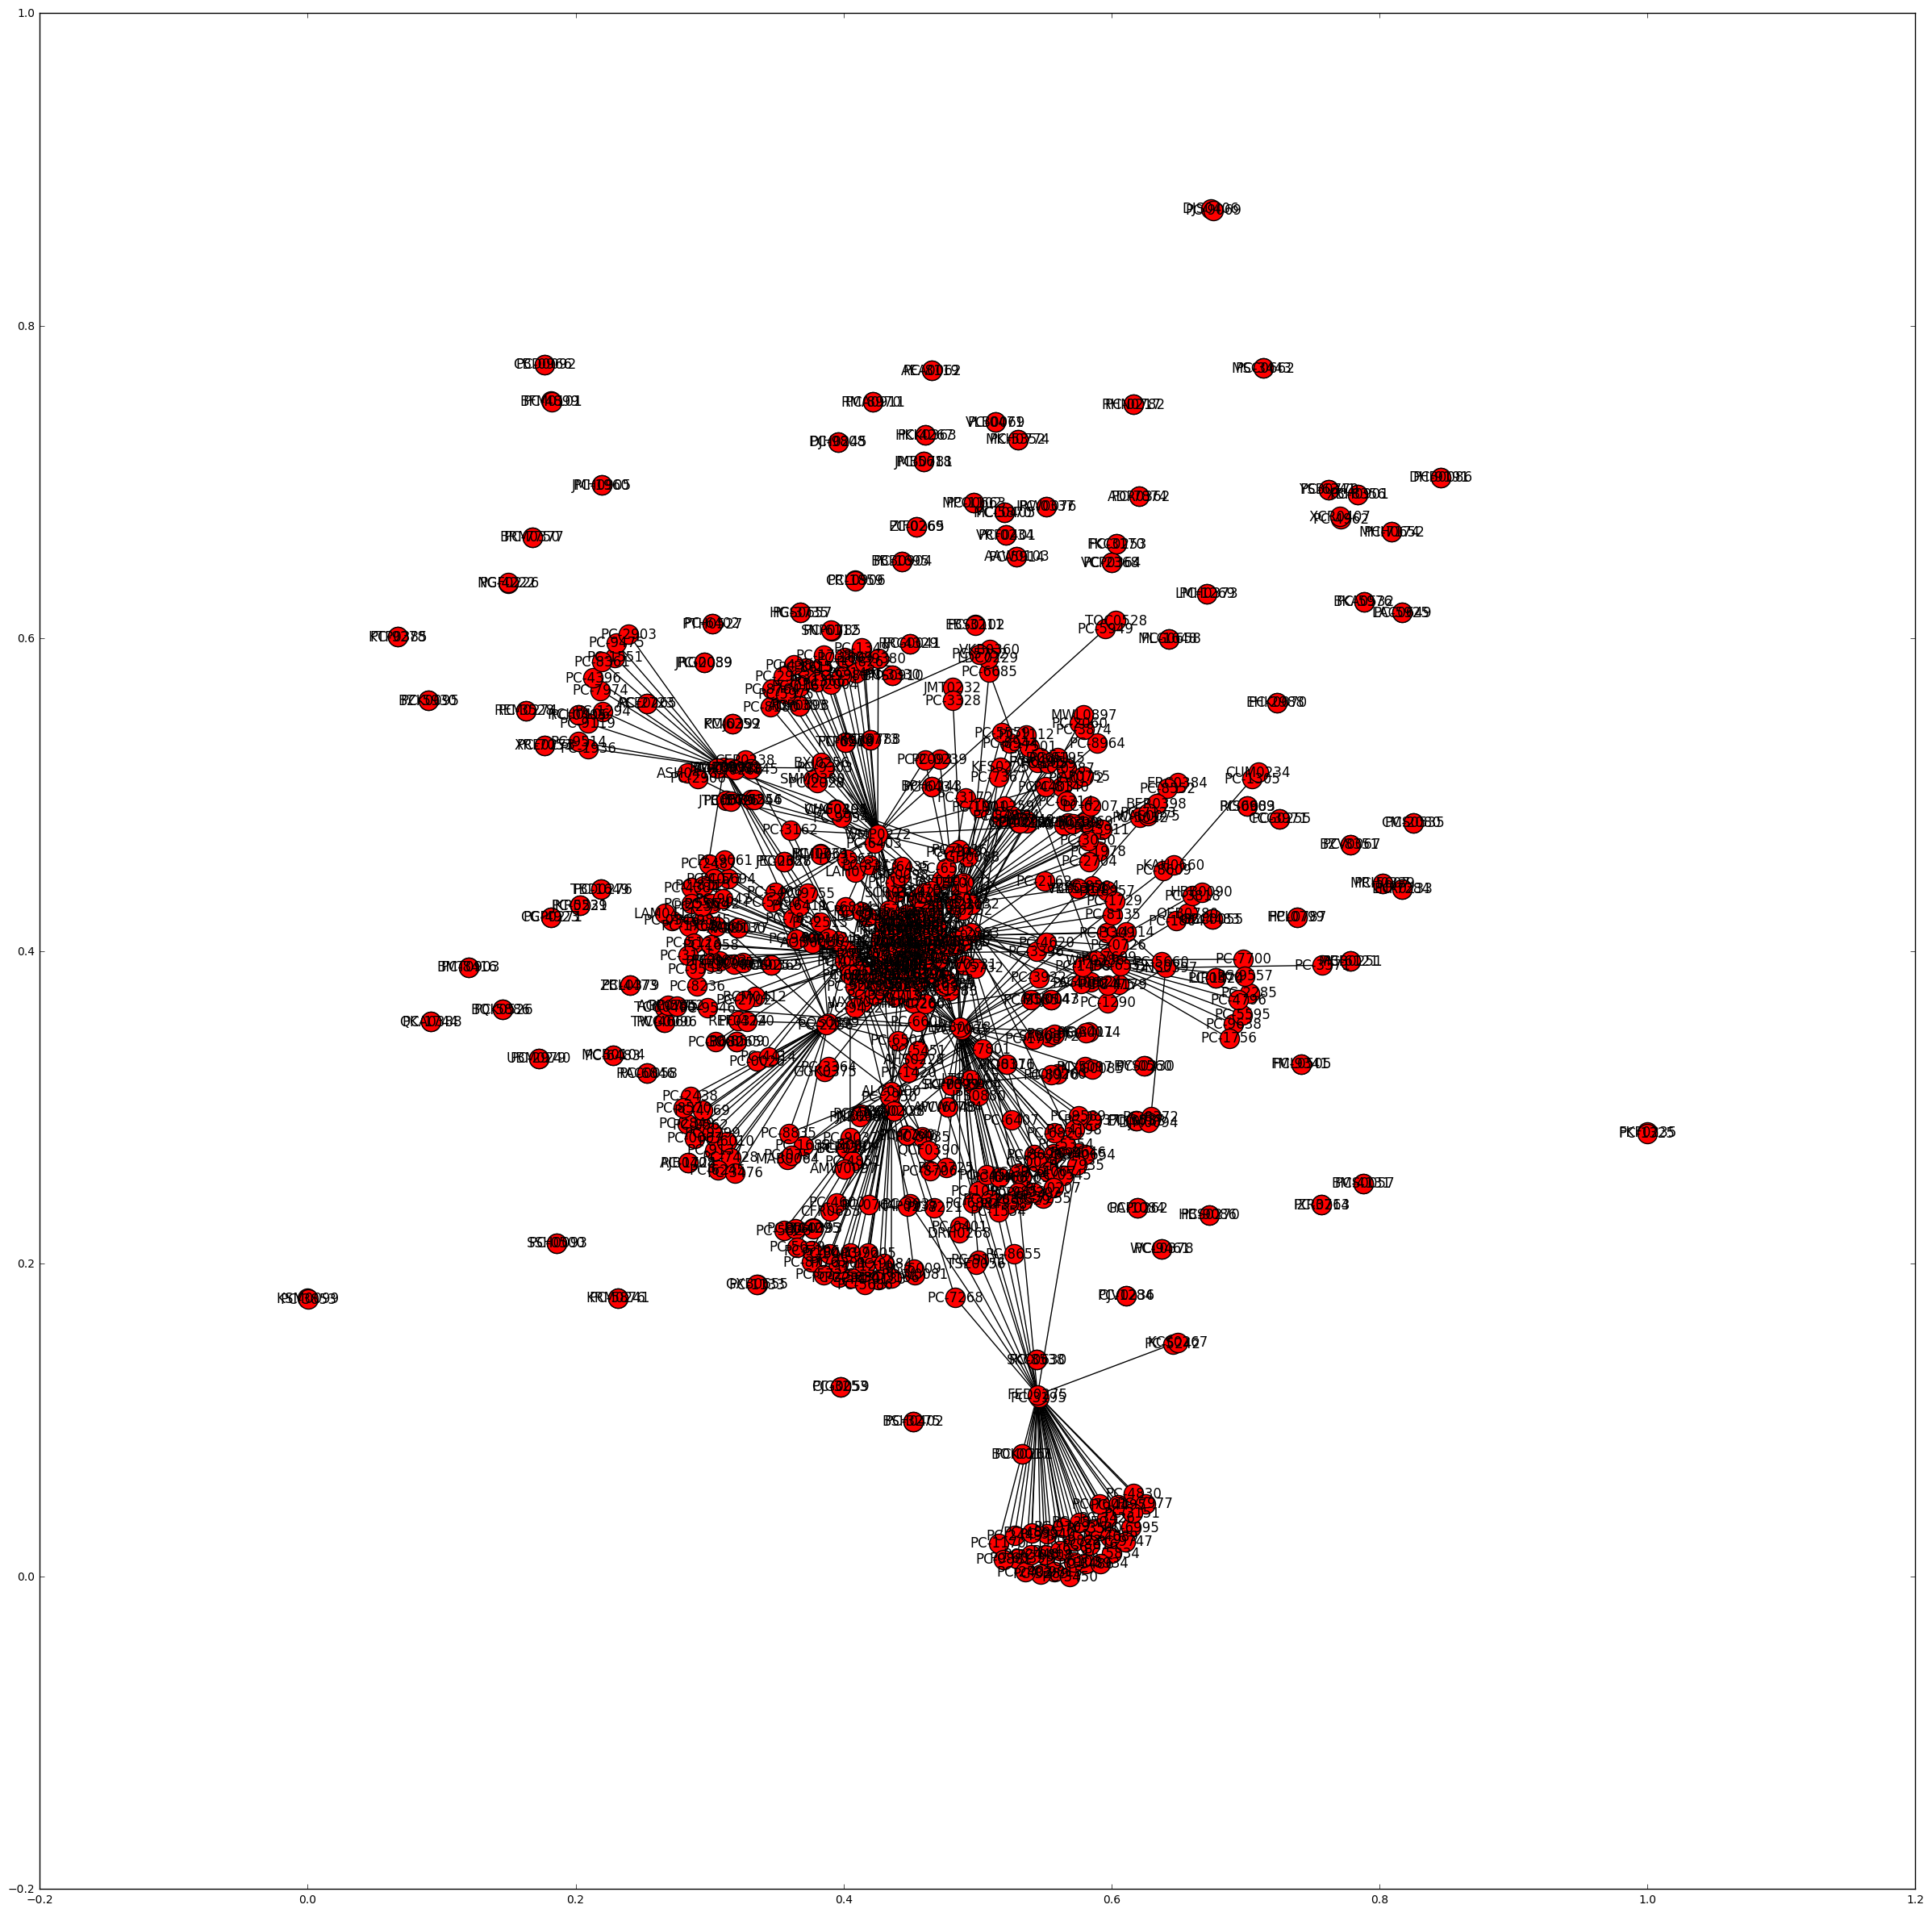

In [78]:
#pos = nx.draw_spectral(B)
# # default
# plt.figure(1)
# nx.draw(B,pos)
# smaller nodes and fonts
#plt.figure(2)
# nx.draw(B,pos,node_size=4,font_size=6) 
# larger figure size
plt.figure(figsize=(30,30)) 
nx.draw_networkx(B)
plt.show()

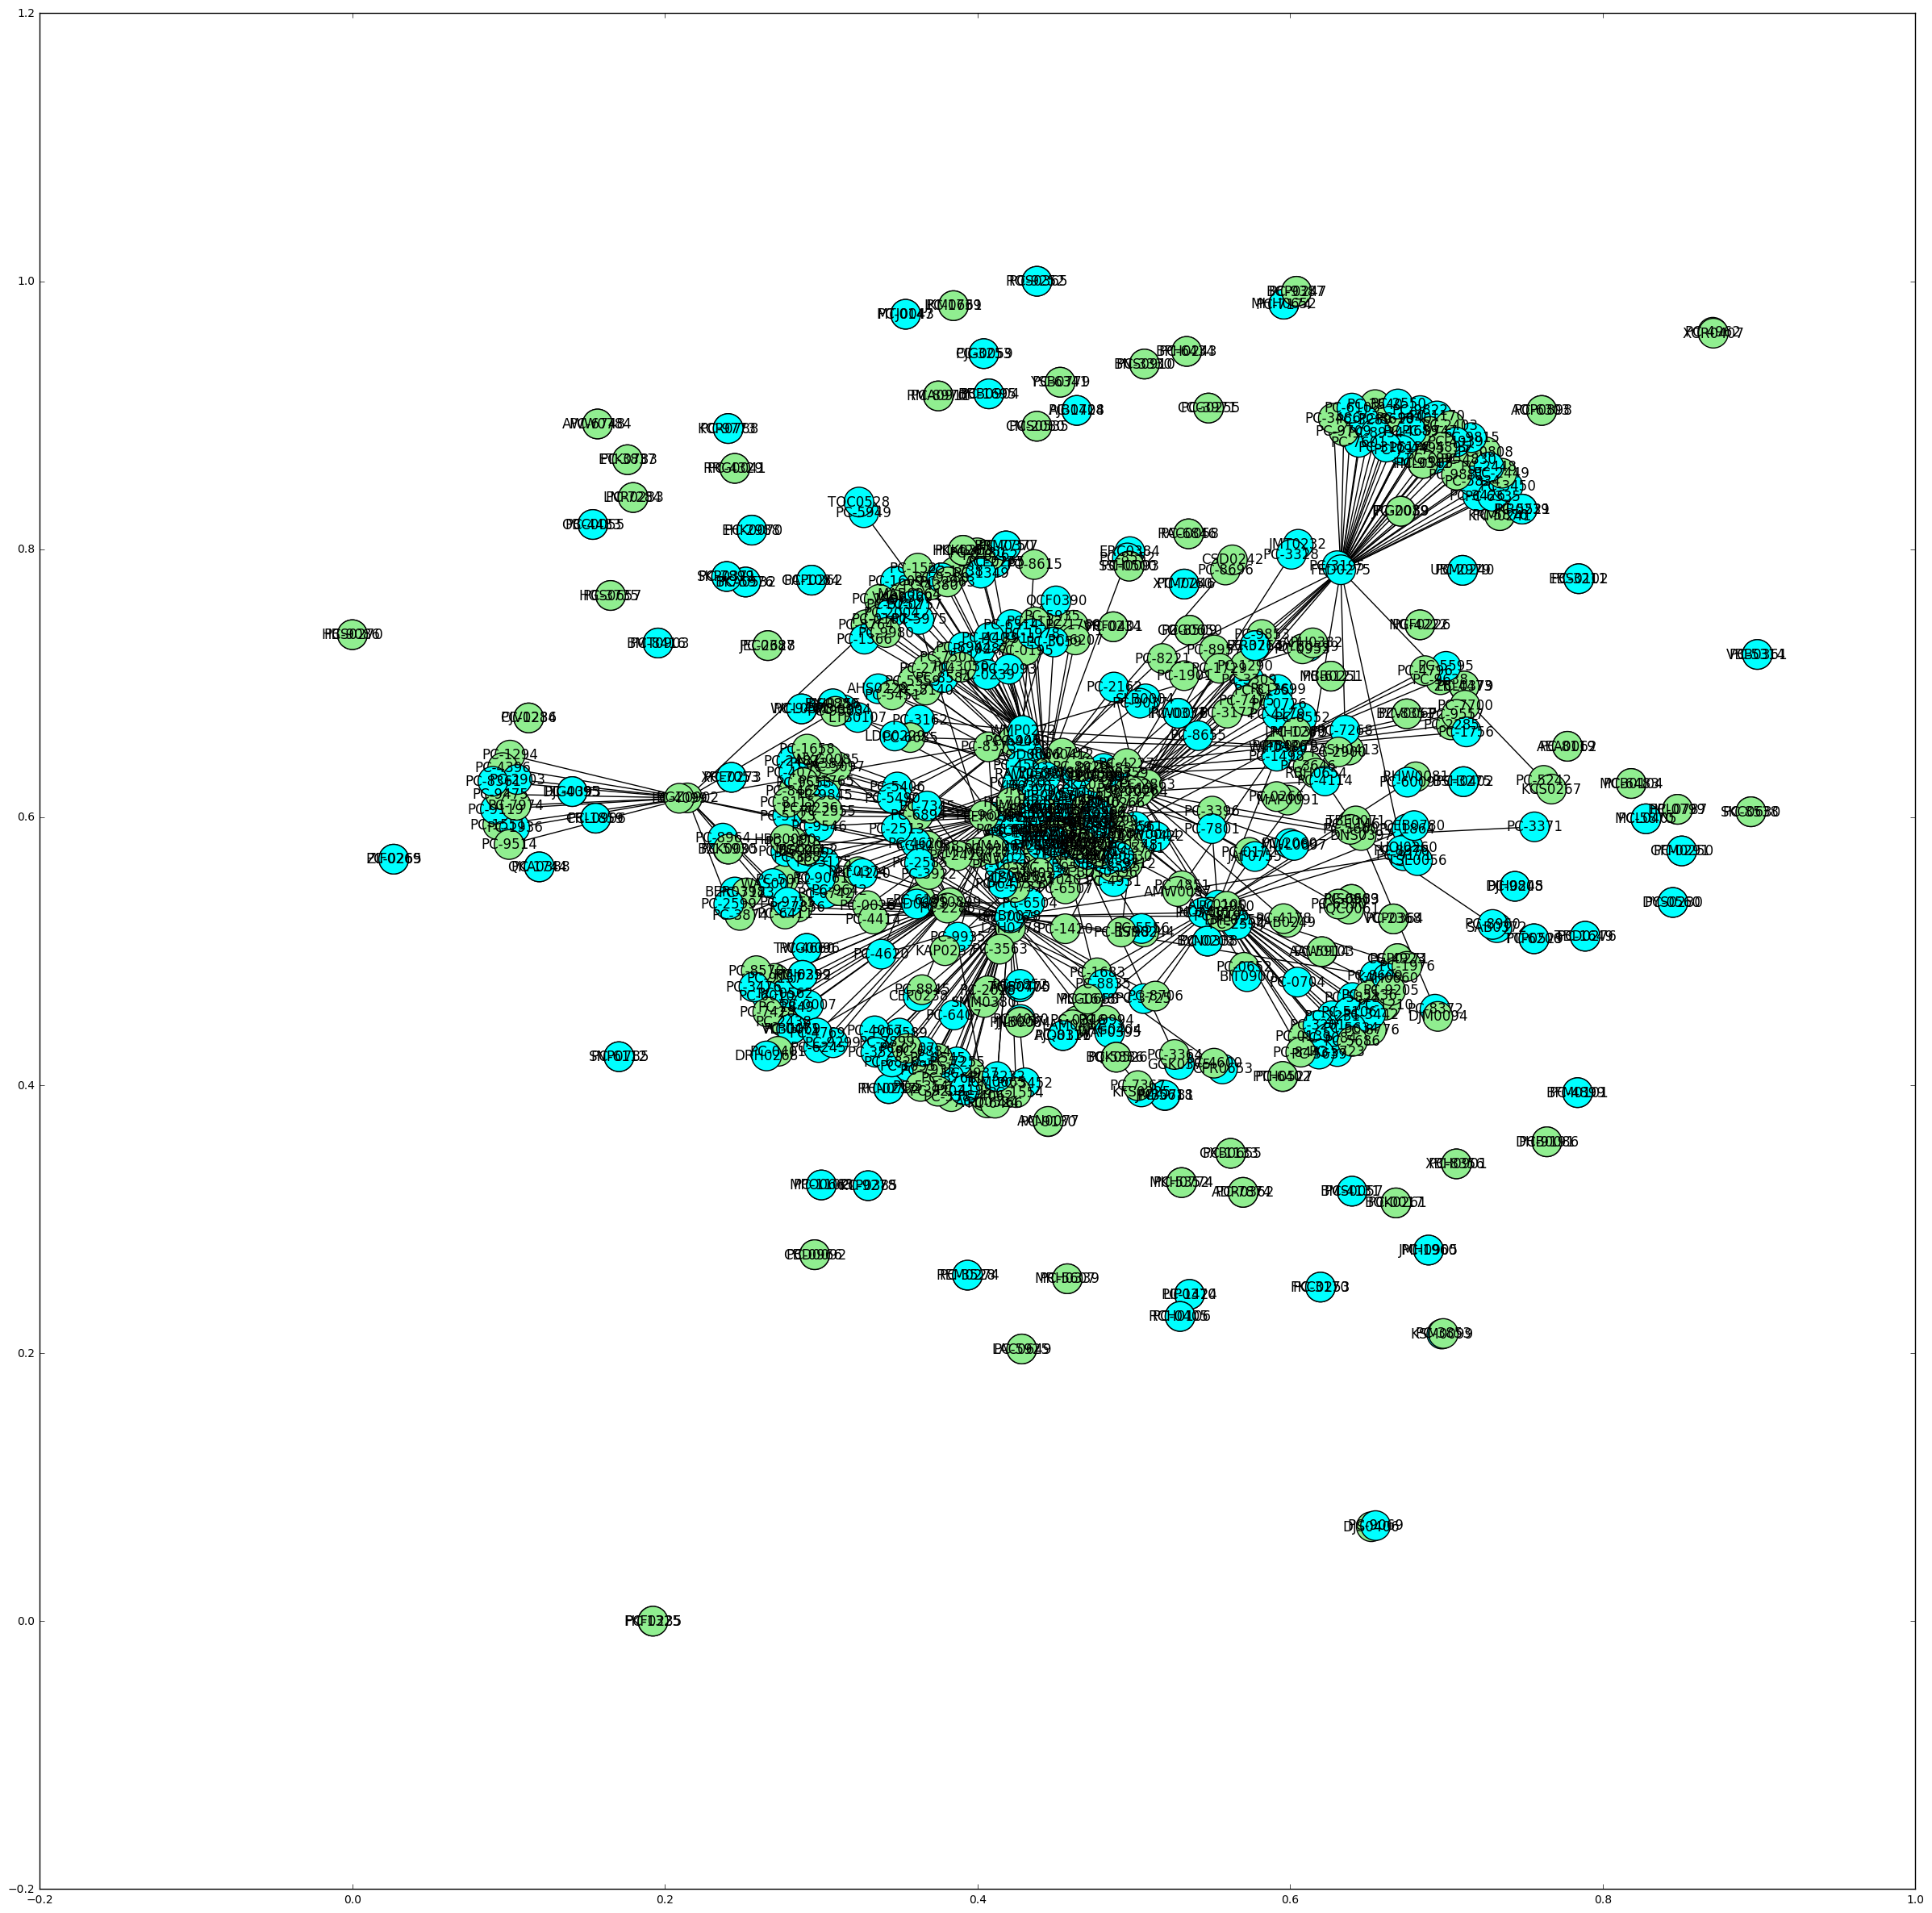

In [165]:
# c = bipartite.color(B)
# nx.set_node_attributes(B, 'bipartite', c)
plt.figure(figsize=(30,30)) 
nx.draw_networkx(B, node_size = 700, node_color = ['lightgreen', 'cyan'])
plt.show()

In [121]:
# Node degree of the graph
node_degrees = nx.degree(B)


In [123]:
type(node_degrees)

dict

In [128]:
node_degrees

{'AAN0077': 1,
 'AAW0103': 1,
 'ACE0265': 1,
 'ACL0394': 2,
 'ADR0362': 1,
 'AEA0062': 1,
 'AGD0524': 1,
 'AGP0775': 1,
 'AHS0228': 1,
 'AJB0408': 1,
 'AJH0366': 2,
 'AJQ0376': 1,
 'AJR0231': 40,
 'ALC0100': 34,
 'AMR0656': 3,
 'AMW0097': 1,
 'AOD0066': 2,
 'AOP0898': 1,
 'APH0382': 1,
 'ARH0777': 5,
 'ASH0413': 1,
 'AWW0784': 1,
 'BBB0904': 1,
 'BCP0247': 1,
 'BDS0396': 3,
 'BER0398': 1,
 'BFM0101': 1,
 'BGZ0902': 20,
 'BIT0900': 1,
 'BKA0340': 2,
 'BKA0532': 1,
 'BMS0057': 1,
 'BMT0903': 1,
 'BNS0910': 1,
 'BOK0261': 1,
 'BPH0243': 1,
 'BQK0526': 1,
 'BRM0377': 1,
 'BSH0402': 1,
 'BSR0244': 1,
 'BXJ0256': 1,
 'BYN0338': 1,
 'BZK0095': 1,
 'BZV0067': 1,
 'CAE0080': 3,
 'CBD0092': 1,
 'CCG0255': 1,
 'CEP0238': 1,
 'CFR0653': 1,
 'CGH0088': 5,
 'CGP0271': 1,
 'CHG0404': 1,
 'CJG0059': 1,
 'CJV0236': 1,
 'CMS0535': 1,
 'CPM0659': 3,
 'CQS0899': 27,
 'CRL0906': 1,
 'CSD0242': 1,
 'CSW0531': 3,
 'CUM0234': 1,
 'DHB0086': 1,
 'DJG0393': 1,
 'DJH0245': 1,
 'DJM0094': 1,
 'DJS0406': 1,
 'DNS0

In [129]:
user_pc = pd.DataFrame(node_degrees.items(), columns=['user', 'pc_count'])

In [131]:
user_pc.head()

,user,pc_count
0,PC-5012,2
1,XTM0246,1
2,MHH0652,1
3,PC-1695,1
4,WXW0044,2


In [166]:
user_pc = user_pc[user_pc.user.isin(gparams.user)]

In [167]:
user_pc.shape

(232, 2)

In [169]:
len(gparams['user'].unique())

232

In [173]:
user_pc.to_csv('./Data_Subset/user_pc_gdegree.csv', index = False)